# Lesson 4: Dimensionless Forms

<b>Tags:</b> #dimensionless #units<br>
<b>Author:</b> Syed Talha Tirmizi <br>
<b>Last update:</b> 2025-12-24 (Created 2025-12-24) <br>

## Description

In engineering analysis, it is often advantageous to formulate problems in a **dimensionless form**. This removes the dependence on specific physical units (such as meters, seconds, or kilograms) and reduces the problem to a set of fundamental ratios.

A dimensionless solution is universal: a single solution curve applies to *every* possible combination of material parameters that shares those same ratios.

### Example: Linear Elastic Spring Vibration

Consider a particle of mass $m$ attached to a linear spring of stiffness $k$, subjected to an external force $F(t)$.

**1. Governing Equation**
The balance of linear momentum (Newton's Second Law) is given by:

$$
m\ddot{u}(t) = -ku(t) + F(t)
$$

Subject to initial conditions $u(0)=u_0$ and $\dot{u}(0)=0$.

**2. Scaling Variables**
We introduce "natural rulers" to scale our variables.
* **Displacement:** We normalize by the initial displacement $u_0$.
* **Time:** We normalize by the natural frequency of the system $\omega_n = \sqrt{k/m}$.

$$
\bar{u} = \frac{u}{u_0} \quad \text{and} \quad \bar{t} = t\sqrt{\frac{k}{m}}
$$

**3. Substitution**
Substituting these into the governing equation and dividing by $k u_0$ yields the dimensionless equation of motion:

$$
\frac{d^2\bar{u}}{d\bar{t}^2} = -\bar{u} + \bar{f}(\bar{t})
$$

Where the dimensionless force is defined as $\bar{f}(\bar{t}) = \frac{F}{k u_0}$.


### Example: The Heat Equation

Consider the transient heat equation derived from the Balance of Energy.

**1. Governing Equation**
$$
\rho c_v \dot{T} = \kappa \nabla^2 T + s
$$

**2. Scaling Variables**
We introduce reference scales for length ($L$) and temperature ($T_0$):

$$
\bar{x} = \frac{x}{L}, \quad \bar{T} = \frac{T}{T_0}
$$

Substituting the spatial derivative $\nabla^2 = \frac{1}{L^2}\bar{\nabla}^2$ into the governing equation:

$$
\rho c_v \dot{T} = \frac{\kappa}{L^2} \bar{\nabla}^2 T + s
$$

**3. Dimensionless Time**
To normalize the time derivative, we identify the **diffusive time scale** $\tau = \frac{\rho c_v L^2}{\kappa}$. This leads to the definition of dimensionless time:

$$
\bar{t} = \frac{\kappa T_0}{\rho c_v T_0 L^2} t \quad \implies \quad \bar{t} = \left( \frac{\kappa}{\rho c_v L^2} \right) t
$$

**4. Final Dimensionless Form**
Substituting all variables yields the universal dimensionless heat equation:

$$
\bar{T}_{,\bar{t}} = \bar{\nabla}^2 \bar{T} + \bar{s}
$$

Where $\bar{s}$ is the dimensionless heat source term $\bar{s} = \frac{s L^2}{\kappa T_0}$.

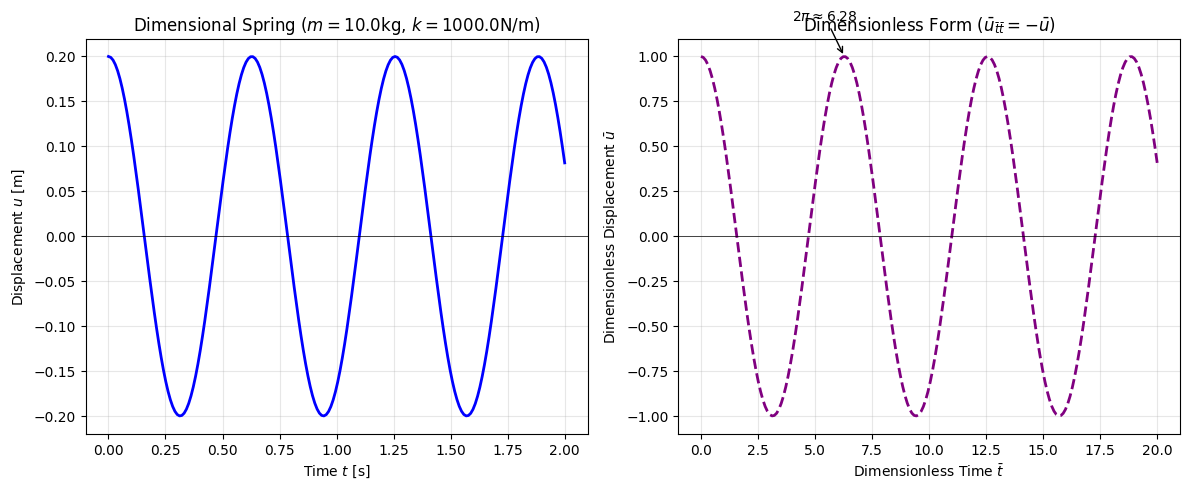

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Physics (Dimensional) ---
m = 10.0      # Mass [kg]
k = 1000.0    # Stiffness [N/m]
u0 = 0.2      # Initial Displacement [m]
omega_n = np.sqrt(k / m)  # Natural frequency [rad/s]

# Time range: 2 seconds
t = np.linspace(0, 2, 200)
# Exact Solution: u(t) = u0 * cos(omega_n * t)
u = u0 * np.cos(omega_n * t)

# --- 2. Define Physics (Dimensionless) ---
# Dimensionless time t_bar = t * omega_n
t_bar = t * omega_n
# Dimensionless displacement u_bar = u / u0
u_bar = u / u0

# --- 3. Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Dimensional (Physical Units)
axes[0].plot(t, u, color='blue', linewidth=2)
axes[0].set_title(f'Dimensional Spring ($m={m}$kg, $k={k}$N/m)')
axes[0].set_xlabel('Time $t$ [s]')
axes[0].set_ylabel('Displacement $u$ [m]')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(0, color='black', linewidth=0.5)

# Plot 2: Dimensionless (Universal)
axes[1].plot(t_bar, u_bar, color='purple', linewidth=2, linestyle='--')
axes[1].set_title(r'Dimensionless Form ($\bar{u}_{\bar{t}\bar{t}} = -\bar{u}$)')
axes[1].set_xlabel(r'Dimensionless Time $\bar{t}$')
axes[1].set_ylabel(r'Dimensionless Displacement $\bar{u}$')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(0, color='black', linewidth=0.5)

# Annotation to show the connection
# One period is always 2*pi in dimensionless time
axes[1].annotate(r'$2\pi \approx 6.28$', xy=(2*np.pi, 1), xytext=(4, 1.2),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()

<>:35: SyntaxWarning: invalid escape sequence '\k'
<>:35: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_3949/75282742.py:35: SyntaxWarning: invalid escape sequence '\k'
  axes[0].set_title(f'Dimensional Heat ($L={L}$m, $\kappa={kappa}$)')


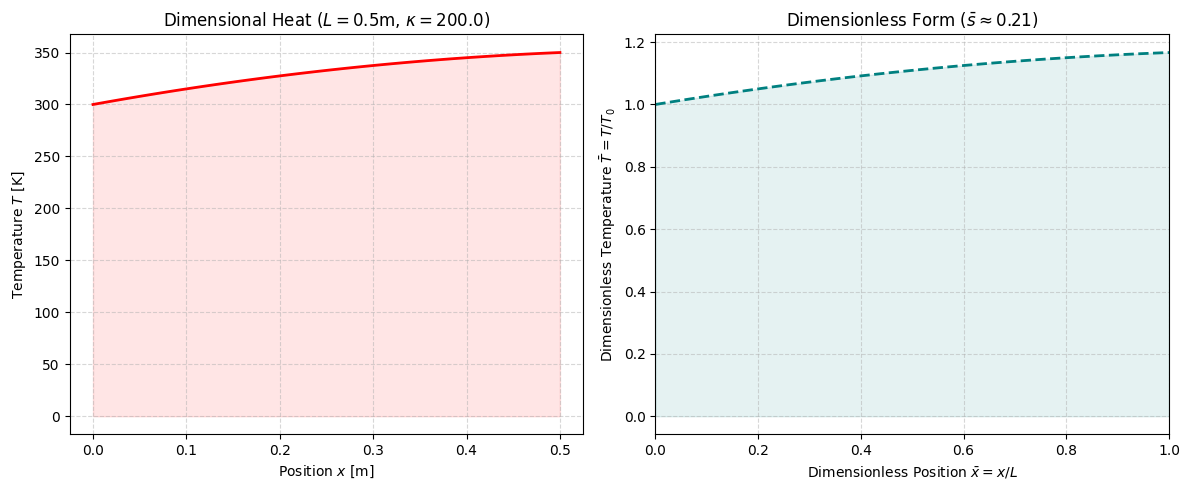

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def exact_heat_solution(x, L, kappa, s, T_left, T_right):
    C2 = T_left
    C1 = (T_right - T_left) / L + (s * L) / (2 * kappa)
    return -(s / (2 * kappa)) * x**2 + C1 * x + C2

# --- 1. Define Physics (Dimensional) ---
L = 0.5           # Length [m]
kappa = 200.0     # Thermal Conductivity (e.g., Aluminum) [W/mK]
s = 50000.0       # Heat Source [W/m^3]
T_left = 300.0    # Left Temp [K]
T_right = 350.0   # Right Temp [K]
T0 = T_left       # Reference Temp (usually the initial or boundary temp)

x = np.linspace(0, L, 100)
T = exact_heat_solution(x, L, kappa, s, T_left, T_right)

# --- 2. Define Physics (Dimensionless) ---
# Calculate the dimensionless groups derived in your notes
x_bar = x / L
T_bar = T / T0

# We can also calculate the dimensionless source (s_bar) to verify the math
# s_bar = (s * L^2) / (kappa * T0)
s_bar_val = (s * L**2) / (kappa * T0)

# --- 3. Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Dimensional (Physical Units)
axes[0].plot(x, T, color='red', linewidth=2)
axes[0].fill_between(x, T, color='red', alpha=0.1)
axes[0].set_title(f'Dimensional Heat ($L={L}$m, $\kappa={kappa}$)')
axes[0].set_xlabel('Position $x$ [m]')
axes[0].set_ylabel('Temperature $T$ [K]')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot 2: Dimensionless (Universal)
axes[1].plot(x_bar, T_bar, color='teal', linewidth=2, linestyle='--')
axes[1].fill_between(x_bar, T_bar, color='teal', alpha=0.1)
axes[1].set_title(rf'Dimensionless Form ($\bar{{s}} \approx {s_bar_val:.2f}$)')
axes[1].set_xlabel(r'Dimensionless Position $\bar{x} = x/L$')
axes[1].set_ylabel(r'Dimensionless Temperature $\bar{T} = T/T_0$')
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()